In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
dta= pd.read_csv("Price_Data.csv")
dta.head(10)

,Date,Petrol (USD)
0,06-09-2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,07-07-2003,74.28
5,7/14/2003,74.21
6,7/21/2003,75.07
7,7/28/2003,75.10
8,08-04-2003,75.12
9,08-11-2003,75.44


In [3]:
dta.shape

(813, 2)

In [4]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


In [5]:
dta["Date"]= pd.to_datetime(dta["Date"])

In [6]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          813 non-null    datetime64[ns]
 1   Petrol (USD)  811 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.8 KB


In [7]:
dta.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [8]:
dta["Petrol (USD)"]=dta["Petrol (USD)"].fillna(dta["Petrol (USD)"].mean())

In [9]:
dta.isnull().sum()

Date            0
Petrol (USD)    0
dtype: int64

In [10]:
dta.rename(columns = {"Petrol (USD)":'Price'},inplace=True)

In [11]:
dta['Date'] = dta['Date'].dt.strftime('%m/%d/%Y')

In [12]:
dta.head()

,Date,Price
0,06/09/2003,74.59
1,06/16/2003,74.47
2,06/23/2003,74.42
3,06/30/2003,74.35
4,07/07/2003,74.28


In [13]:
dta.head()

,Date,Price
0,06/09/2003,74.59
1,06/16/2003,74.47
2,06/23/2003,74.42
3,06/30/2003,74.35
4,07/07/2003,74.28


In [14]:
# grouping sales according to Date
dta.groupby('Date')['Price'].sum()

# min and max values of  Date
print(dta['Date'].min())
print(dta['Date'].max())

01/01/2007
12/31/2018


In [15]:
#set 'Date' as index
dta_df = dta.set_index('Date')
dta_df.index

Index(['06/09/2003', '06/16/2003', '06/23/2003', '06/30/2003', '07/07/2003',
       '07/14/2003', '07/21/2003', '07/28/2003', '08/04/2003', '08/11/2003',
       ...
       '10/29/2018', '11/05/2018', '11/12/2018', '11/19/2018', '11/26/2018',
       '12/03/2018', '12/10/2018', '12/17/2018', '12/24/2018', '12/31/2018'],
      dtype='object', name='Date', length=813)

In [16]:
dta_df.index = pd.to_datetime(dta_df.index)

In [17]:
dta_df.index

DatetimeIndex(['2003-06-09', '2003-06-16', '2003-06-23', '2003-06-30',
               '2003-07-07', '2003-07-14', '2003-07-21', '2003-07-28',
               '2003-08-04', '2003-08-11',
               ...
               '2018-10-29', '2018-11-05', '2018-11-12', '2018-11-19',
               '2018-11-26', '2018-12-03', '2018-12-10', '2018-12-17',
               '2018-12-24', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=813, freq=None)

In [18]:
dta_df.head(10)

,Price
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28
2003-07-14,74.21
2003-07-21,75.07
2003-07-28,75.10
2003-08-04,75.12


In [19]:
dta_df.tail(10)

,Price
Date,
2018-10-29,130.64
2018-11-05,130.11
2018-11-12,128.94
2018-11-19,127.40
2018-11-26,125.77
2018-12-03,124.30
2018-12-10,122.37
2018-12-17,121.02
2018-12-24,120.61


In [20]:
# average the daily cases value for each month 
# use start of each month as the timestamp
y = dta_df['Price'].resample('MS').mean()
y['2003':]

Date
2003-06-01     74.4575
2003-07-01     74.6650
2003-08-01     75.6050
2003-09-01     76.1580
2003-10-01     76.0950
                ...   
2018-08-01    128.5950
2018-09-01    130.2950
2018-10-01    130.5120
2018-11-01    128.0550
2018-12-01    121.6960
Freq: MS, Name: Price, Length: 187, dtype: float64

## Data Visualization

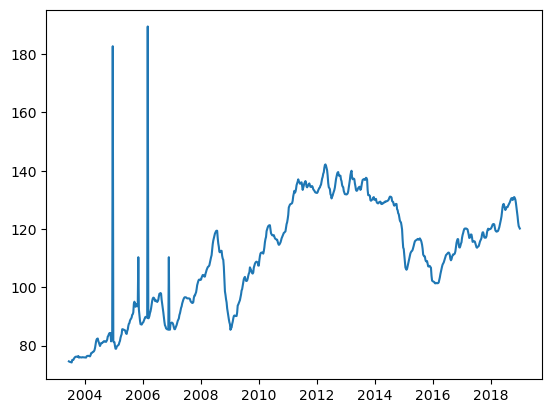

In [21]:
plt.plot(dta_df.Price)

(array([114., 133., 104., 202., 128., 130.,   0.,   0.,   0.,   2.]),
 array([ 74.21,  85.74,  97.27, 108.8 , 120.33, 131.86, 143.39, 154.92,
        166.45, 177.98, 189.51]),
 <BarContainer object of 10 artists>)

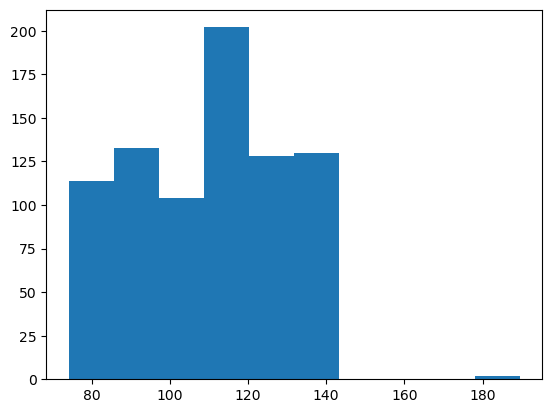

In [22]:
plt.hist(dta_df.Price)

In [23]:
result=seasonal_decompose(dta_df["Price"],model= "multiplicative",period=30)

<Figure size 2000x1000 with 0 Axes>

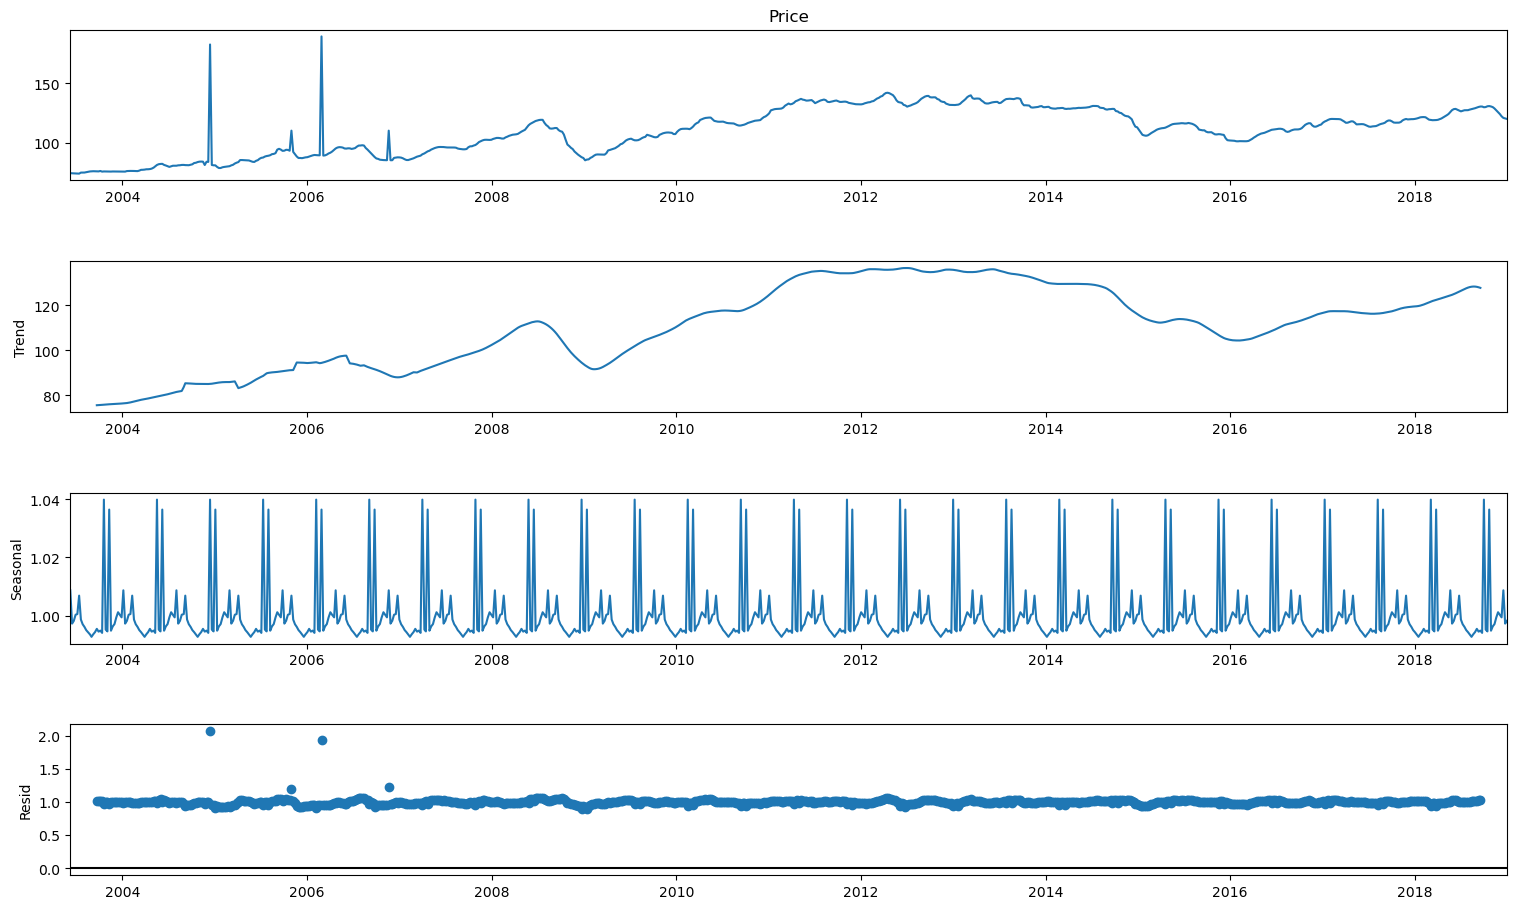

In [24]:
plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [25]:
sm.stats.durbin_watson(dta_df)

array([0.00415672])

C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


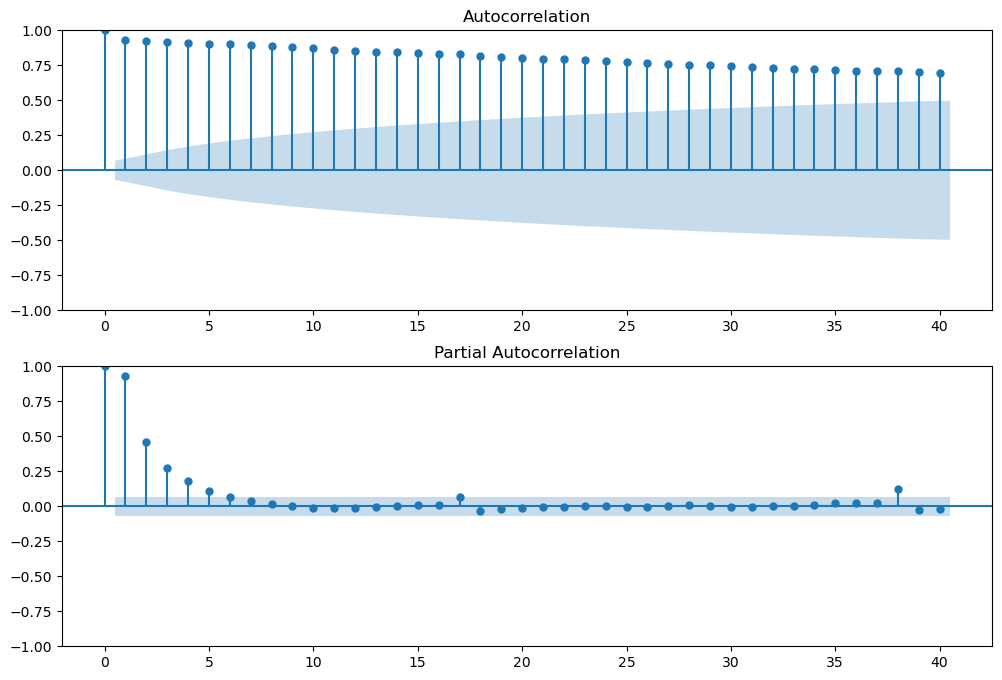

In [26]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta_df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta_df, lags=40, ax=ax2)

In [27]:
training_data=dta_df[0:500]
test_data=dta_df[500
                 :]

In [28]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [29]:
arima= ARIMA(training_data,order=(2,1,3))

In [30]:
import itertools
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [31]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2296.9810728194025
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2092.198480221161
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1371.7904333848646
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1373.6379839584206
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1518.7538849360512
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1520.6187290334015
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1373.6129305563336
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1375.1210087608365
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2056.3720251305103
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1853.5379654724252
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1249.670958291757
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1249.4004275734328
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1383.3285486877876
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1383.1385357014337
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1249.6478809577313
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1250.491172793681
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1096.4651732166471
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1098.350924189

In [32]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12),
                                  enforce_stationarity = False,
                                  enforce_invertibility=False
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6325      0.222      2.852      0.004       0.198       1.067
ma.L1         -0.7468      0.222     -3.369      0.001      -1.181      -0.312
ar.S.L12      -0.4986      0.030    -16.787      0.000      -0.557      -0.440
sigma2        28.2065      1.815     15.538      0.000      24.648      31.765


In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Price   No. Observations:                  187
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -497.300
Date:                             Tue, 26 Sep 2023   AIC                           1002.601
Time:                                     10:15:27   BIC                           1014.926
Sample:                                 06-01-2003   HQIC                          1007.605
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6325      0.222      2.852      0.004       0.198       1.067
ma.L1         -0.7468      0.222     -3.369      0.001      -1.181      -0.312
ar.S.L12      -0.4986      0.030    -16.787      0.000      -0.557      -0.440
sigma2        28.2065      1.815     15.538      0.000      24.648      31.765
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               182.15
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Train the ARIMA Model

In [34]:
series = dta_df['Price']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  813
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2584.884
Date:                Tue, 26 Sep 2023   AIC                           5181.769
Time:                        10:15:28   BIC                           5209.966
Sample:                             0   HQIC                          5192.593
                                - 813                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7259      0.008    -87.353      0.000      -0.742      -0.710
ar.L2         -0.5041      0.013    -39.337      0.000      -0.529      -0.479
ar.L3         -0.3369      0.017    -19.402      0.0

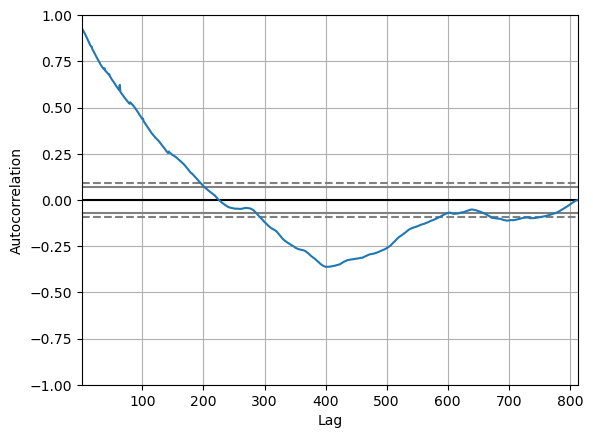

<Figure size 800x560 with 0 Axes>

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

## Predictions

In [36]:
pred = result.predict('2019','2021',dynamic=True)
pred

2019-01-01    125.226211
2019-02-01    126.563336
2019-03-01    125.655030
2019-04-01    125.776250
2019-05-01    127.733847
2019-06-01    128.632006
2019-07-01    127.584215
2019-08-01    129.227017
2019-09-01    131.358790
2019-10-01    131.023646
2019-11-01    130.694520
2019-12-01    127.931646
2020-01-01    130.235173
2020-02-01    130.844798
2020-03-01    129.570773
2020-04-01    130.391505
2020-05-01    133.643921
2020-06-01    135.470878
2020-07-01    134.531448
2020-08-01    136.048856
2020-09-01    137.965434
2020-10-01    137.905676
2020-11-01    136.515551
2020-12-01    131.959535
2021-01-01    134.874751
Freq: MS, Name: predicted_mean, dtype: float64

In [37]:
pred.to_csv('E:/Ineuron-DS Course/Machine-Learning-Practice/Interships/Intership-PetrolPriceForecasting/Predicted.csv')

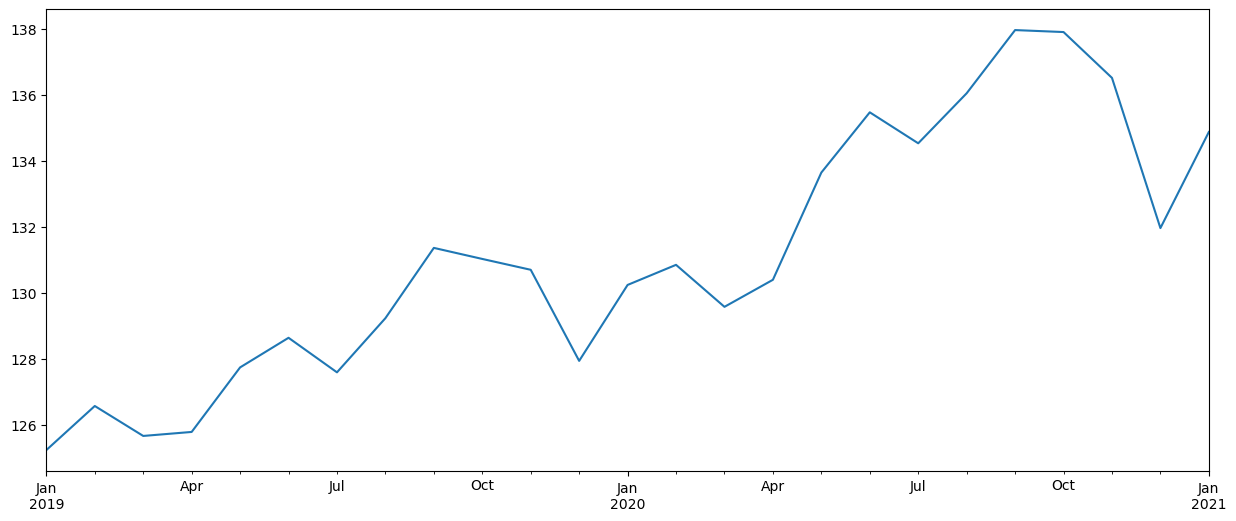

In [38]:
pred.plot(figsize = (15, 6))
plt.show()

## Validating Forecasts

In [41]:
prediction = result.get_prediction(start = pd.to_datetime('01-01-2019'),end=pd.to_datetime('04-12-2020'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Price,upper Price
2019-01-01,114.816884,135.635537
2019-02-01,112.658117,140.468555
2019-03-01,109.374779,141.935282
2019-04-01,107.640533,143.911968
2019-05-01,108.035093,147.432600
2019-06-01,107.553938,149.710075
2019-07-01,105.251797,149.916634
2019-08-01,105.730841,152.723193
2019-09-01,106.768098,155.949482
2019-10-01,105.393729,156.653563


In [43]:
prediction_ci.to_csv('E:/Ineuron-DS Course/Machine-Learning-Practice/Interships/Intership-PetrolPriceForecasting/Predicted2.csv')

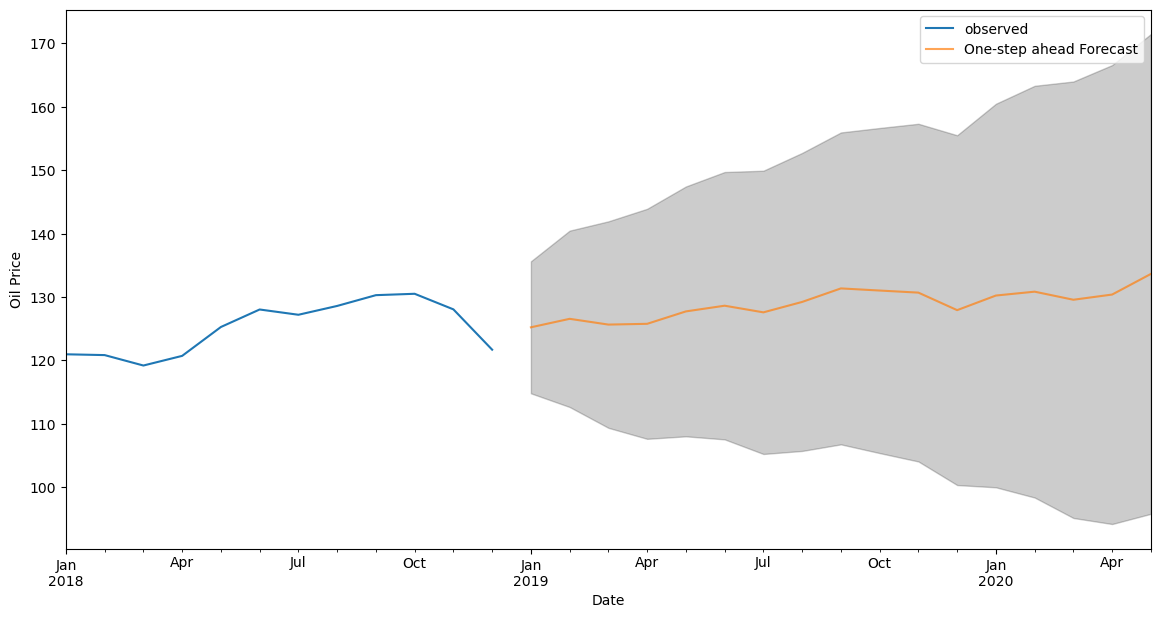

In [44]:
#Visualize the forecasting
ax = y['2018':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Oil Price')
plt.legend()
plt.show()